<a href="https://colab.research.google.com/github/bitkira/Colab/blob/main/tutorial_notebooks_zh/quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EvoAgentX 快速开始指南

本快速开始指南将引导你完成使用 EvoAgentX 的基础步骤。在本教程中，你将学习如何：
1. 配置用于访问 LLM 的 API 密钥  
2. 自动创建并执行工作流  

## 安装

In [15]:
!pip install git+https://github.com/EvoAgentX/EvoAgentX.git

  Cloning https://github.com/EvoAgentX/EvoAgentX.git to /tmp/pip-req-build-kbjcscmo
  Running command git clone --filter=blob:none --quiet https://github.com/EvoAgentX/EvoAgentX.git /tmp/pip-req-build-kbjcscmo
  Resolved https://github.com/EvoAgentX/EvoAgentX.git to commit 3fcff13b60c4ef24e5a8b9626c90e57cd4f64777
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [17]:
pip install pytest pytest-cov pytest-mock pytest-asyncio pytest-subtests pytest-json-report ruff sympy overdue scipy>=1.9.0 setuptools tree_sitter tree_sitter_python antlr4-python3-runtime==4.11 tenacity networkx>=3.3 nltk>=3.9.1 numpy>=1.26.4 openai>=1.55.3 litellm>=1.55.6 dashscope>=1.23.4 pydantic>=2.9.0 loguru>=0.7.3 pandas>=2.2.3 matplotlib>=3.10.0 transformers>=4.47.1 datasets>=3.4.0 faiss-cpu==1.8.0.post1 textgrad>=0.1.8 dspy fastapi>=0.115.11 motor>=3.7.0 uvicorn>=0.34.0 sqlalchemy>=2.0.38 python-jose>=3.3.0 passlib>=1.7.4 python-multipart>=0.0.6 bcrypt>=4.0.1 celery>=5.3.4 redis>=5.0.0 httpx>=0.24.1 asgi-lifespan>=1.0.1 python-dotenv>=1.0.0 jwt>=1.3.1 bs4 neo4j ollama llama-index llama-index-vector-stores-faiss llama-index-graph-stores-neo4j sentence-transformers docx2txt python-pptx Pillow docker>=6.0.0 googlesearch-python>=1.2.0 wikipedia>=1.4.0 fastmcp>=0.1.0 requests>=2.28.0 reportlab>=3.6.0 PyPDF2>=3.0.0 selenium>=4.0.0 webdriver-manager>=3.8.0 html2text>=2020.1.16 "browser-use; python_version >= '3.11'" "browser-use-py310; python_version < '3.11'" mcp>=0.1.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evoagentx 0.1.0 requires pydantic<=2.10.6,>=2.9.0, but you have pydantic 2.11.7 which is incompatible.
evoagentx 0.1.0 requires pydantic_core<=2.27.2,>=2.23.2, but you have pydantic-core 2.33.2 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


请参阅 [安装指南](./installation.md) 获取更多详细信息。

## API 密钥 和 LLM 设置

要在 EvoAgentX 中执行工作流，首先需要配置用于访问大模型（LLM）的 API 密钥。推荐以下两种方式：

### 方法一：在终端设置环境变量

此方法直接在系统环境中设置 API 密钥。

对于 Linux/macOS：

In [ ]:
export OPENAI_API_KEY=<你的-openai-api-key>


对于 Windows 命令提示符：

In [ ]:
set OPENAI_API_KEY=<你的-openai-api-key>


对于 Windows PowerShell：

In [ ]:
$env:OPENAI_API_KEY="<你的-openai-api-key>"  # 引号是必需的


设置完成后，可在 Python 中这样获取：

In [ ]:
import os
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")


### 方法二：使用 `.env` 文件

也可以在项目根目录下创建 `.env` 文件来存储 API 密钥。

文件内容示例：

In [ ]:
OPENAI_API_KEY=<你的-openai-api-key>


然后在 Python 中使用 `python-dotenv` 加载：

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()  # 从 .env 文件加载环境变量
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")


🔐 提示：切勿将 `.env` 文件提交到公共平台（如 GitHub），请将其添加到 `.gitignore`。

### 在 EvoAgentX 中配置并使用 LLM

配置好 API 密钥后，可按如下方式初始化并使用 LLM：

In [3]:
from evoagentx.models import OpenAILLMConfig, OpenAILLM

# 从环境加载 API 密钥
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# 定义 LLM 配置
openai_config = OpenAILLMConfig(
    model="gpt-4o-mini",       # 指定模型名称
    openai_key=OPENAI_API_KEY, # 直接传入密钥
    stream=True,               # 启用流式响应
    output_response=True       # 打印响应到标准输出
)

# 初始化语言模型
llm = OpenAILLM(config=openai_config)

# 从 LLM 生成响应
response = llm.generate(prompt="What is Agentic Workflow?")

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

### 方式三：配置colab
下面的代码可以先从colab中读取apikey

In [21]:
import os
from dotenv import load_dotenv
from evoagentx.models import OpenAILLMConfig
from evoagentx.agents import CustomizeAgent

try:
    from google.colab import userdata
    OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")
except ImportError:
    OPENAI_API_KEY = None

if not OPENAI_API_KEY:
    load_dotenv()
    OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# Configure LLM
openai_config = OpenAILLMConfig(
    model="gpt-4o-mini",
    openai_key=OPENAI_API_KEY,
    stream=True
)

llm = OpenAILLM(config=openai_config)


你可以在 [LLM 模块指南](./modules/llm.md) 中找到更多关于支持的 LLM 类型及其参数的详细信息。

## 自动工作流生成与执行

配置完成后，即可在 EvoAgentX 中自动生成并执行智能工作流。本节展示生成工作流、实例化代理并运行的核心步骤。

首先，导入必要的模块：


In [19]:
from evoagentx.workflow import WorkFlowGenerator, WorkFlowGraph, WorkFlow
from evoagentx.agents import AgentManager


### 第一步：生成工作流与任务图
使用 `WorkFlowGenerator` 基于自然语言目标自动创建工作流：

In [22]:
goal = "Generate html code for the Tetris game that can be played in the browser."
wf_generator = WorkFlowGenerator(llm=llm)
workflow_graph: WorkFlowGraph = wf_generator.generate_workflow(goal=goal)

2025-08-04 09:32:03.857 | INFO     | evoagentx.workflow.workflow_generator:_execute_with_retry:89 - Generating a workflow plan (attempt 1/2) ...
2025-08-04 09:32:22.120 | INFO     | evoagentx.models.model_utils:update_cost:87 - Total cost: $0.001 | Total tokens: 2778 | Current cost: $0.001 | Current tokens: 2778
2025-08-04 09:32:22.139 | INFO     | evoagentx.workflow.workflow_generator:_execute_with_retry:89 - Building workflow from plan (attempt 1/2) ...
2025-08-04 09:32:22.142 | INFO     | evoagentx.workflow.workflow_generator:generate_workflow:130 - Validating initial workflow structure...
2025-08-04 09:32:22.143 | INFO     | evoagentx.workflow.workflow_generator:generate_workflow:132 - Successfully generate the following workflow:
Task Name: setup_game_structure
Description: Create the basic HTML structure for the Tetris game, including the canvas and game controls.
Inputs:
  - goal (string, required): The user's goal in textual format.
Outputs:
  - html_structure (string, required

`WorkFlowGraph` 是一个数据结构，用于存储整体工作流计划，包括任务节点及其关系，但尚未包含可执行的代理。

可选：可视化或保存生成的工作流：

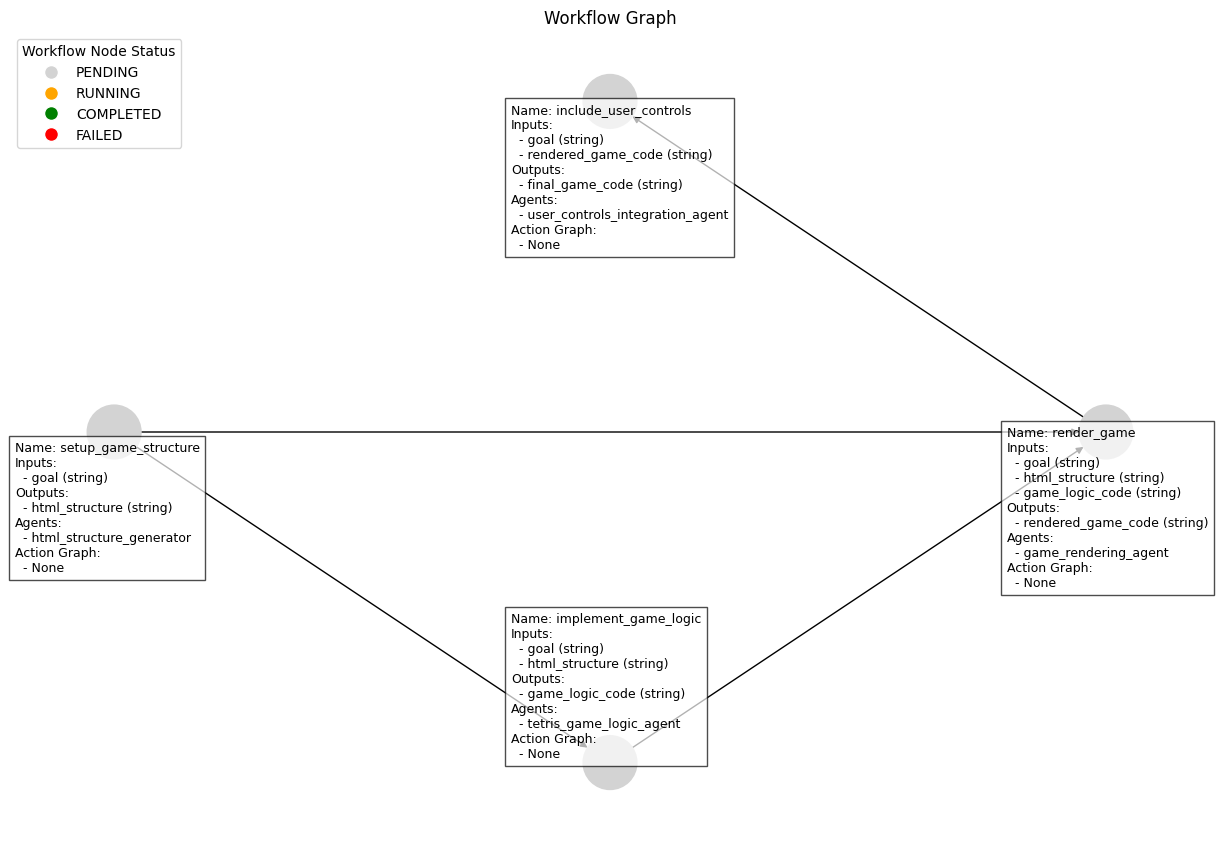

2025-08-04 09:35:06.442 | INFO     | evoagentx.core.module:save_module:437 - Saving WorkFlowGraph to /path/to/save/workflow_demo.json


'/path/to/save/workflow_demo.json'

In [23]:
# 可视化工作流结构（可选）
workflow_graph.display()

# 将工作流保存为 JSON 文件（可选）
workflow_graph.save_module("/path/to/save/workflow_demo.json")

我们提供了一个生成的工作流示例 [here](https://github.com/EvoAgentX/EvoAgentX/blob/main/examples/output/tetris_game/workflow_demo_4o_mini.json)。你可以重新加载保存的工作流：

In [24]:
workflow_graph = WorkFlowGraph.from_file("/path/to/save/workflow_demo.json")


### 第二步：创建并管理执行代理

使用 `AgentManager` 基于工作流图实例化并管理代理：

In [25]:
agent_manager = AgentManager()
agent_manager.add_agents_from_workflow(workflow_graph, llm_config=openai_config)


### 第三步：执行工作流
代理准备就绪后，可以创建 `WorkFlow` 实例并运行：

In [26]:
workflow = WorkFlow(graph=workflow_graph, agent_manager=agent_manager, llm=llm)
output = workflow.execute()
print(output)

RuntimeError: Cannot run the event loop while another loop is running


更多示例请参见 [完整工作流演示](https://github.com/EvoAgentX/EvoAgentX/blob/main/examples/workflow_demo.py)。